In [12]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
def basic_bar_plot(x, y, xt, yt, title, rot):
    plt.bar(x, y)
    plt.xlabel(xt)
    plt.ylabel(yt)
    plt.title(title)
    plt.xticks(rotation=rot)
    for i, curr_y in enumerate(y):
        plt.text(i, curr_y, str(curr_y), ha='center', va='bottom')
    plt.show()
    
def basic_hist_plot(x, y, )
    
def s2s_plot(subreddit, rows, imgs, label1, label2, xt, yt, title):
    width = 0.35
    x = np.arange(len(subreddit))
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, imgs, width, label=label1)
    bars2 = ax.bar(x + width/2, rows, width, label=label2)
    ax.set_xlabel(xt)
    ax.set_ylabel(yt)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(subreddit, rotation=75)
    ax.legend()
    ax.bar_label(bars1, padding=3)
    ax.bar_label(bars2, padding=3)
    plt.tight_layout()
    plt.show()

def get_image_count():
    main_folder = '../data/files'
    file_row_counts = {}
    file_img_count = {}
    for file in os.listdir(main_folder):
        file_path = os.path.join(main_folder, file)
        df = pd.read_csv(file_path)
        row_count = len(df)
        df.dropna(subset=['image_location'], inplace=True)
        urls = list(df['image_location'].values)
        cnt = 0
        for url in urls:
            url = "." + url
            if os.path.exists(url):
                cnt += 1
        file_row_counts[file] = row_count
        file_img_count[file] = cnt
    
    subreddit = list(file_row_counts.keys())
    rows = list(file_row_counts.values())
    imgs = list(file_img_count.values())
    return subreddit, rows, imgs

## Dataset and Image Size by Subreddit

In [3]:
subreddit, rows, imgs = get_image_count()

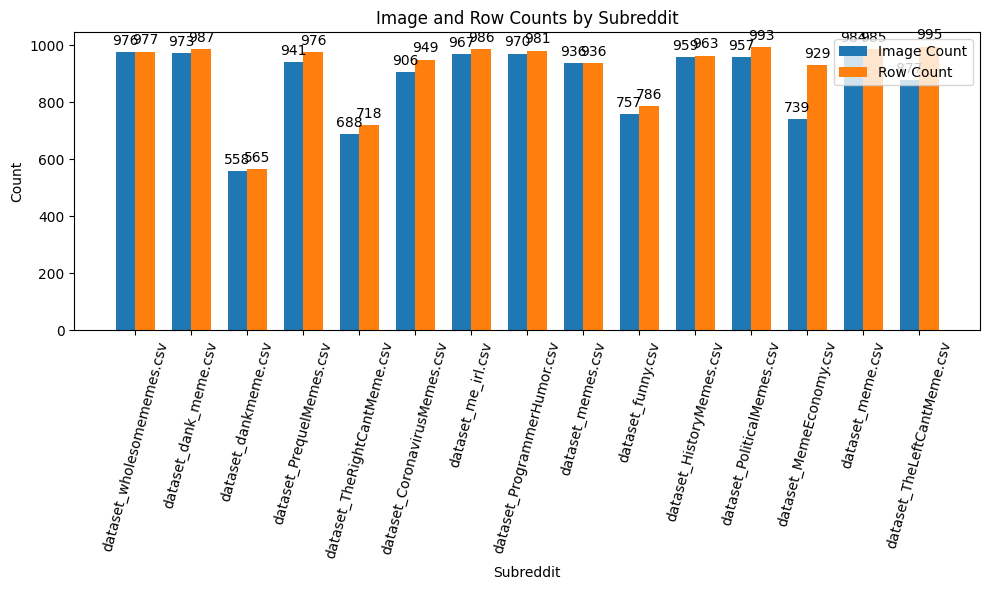

In [4]:
s2s_plot(subreddit, rows, imgs, 'Image Count', 'Row Count', 'Subreddit', 'Count', 'Image and Row Counts by Subreddit')

## Meme vs Not a Meme Counts by Subreddit

In [28]:
with open("reddit_annotation.json", "r") as f:
    reddit_annotation = json.load(f)
reddit_annotation

{'./data/CoronavirusMemes/z6kdmwlyr7591.jpg': '0',
 './data/CoronavirusMemes/i9kvenzwjhb91.jpg': '1',
 './data/CoronavirusMemes/Jjes5nj.jpg': '0',
 './data/CoronavirusMemes/nsp3y04h55j81.jpg': '0',
 './data/CoronavirusMemes/vo0lmnjixii81.jpg': '1',
 './data/CoronavirusMemes/elj442jlb3c81.jpg': '1',
 './data/CoronavirusMemes/hr43a0uqc6d81.jpg': '0',
 './data/CoronavirusMemes/77r2zs1bdyc81.png': '1',
 './data/CoronavirusMemes/jh5pytx2oic81.jpg': '1',
 './data/CoronavirusMemes/u4qws9dibaa81.jpg': '1',
 './data/dank_meme/j9tprdwykp1b1.jpg': '1',
 './data/dank_meme/0ldm7kp0io1b1.jpg': '0',
 './data/dank_meme/gnl74s77am1b1.jpg': '0',
 './data/dank_meme/610x3q08ze1b1.png': '1',
 './data/dank_meme/ydwlqrjdvg1b1.jpg': '0',
 './data/dank_meme/dvm318i27c1b1.jpg': '0',
 './data/dank_meme/6F4Kogi.jpg': '0',
 './data/dank_meme/e5rt82t2ef1b1.jpg': '0',
 './data/dank_meme/6nryokZ.jpg': '0',
 './data/dank_meme/6cy3sjxh641b1.jpg': '0',
 './data/dankmeme/yztxj77x9kya1.jpg': '0',
 './data/dankmeme/hwt7vrg

In [29]:
subreddit = set()
sub0, sub1 = {}, {}
sl0, sl1 = [], []
for k, v in reddit_annotation.items():
    sr = k.split('/')[2]
    subreddit.add(sr)
    if v == "0":
        if sr not in sub0:
            sub0[sr] = 0
        sub0[sr] += 1
    elif v == "1":
        if sr not in sub1:
            sub1[sr] = 0
        sub1[sr] += 1

subreddit = list(subreddit)
for sr in subreddit:
    if sr in sub0:
        sl0.append(sub0[sr])
    else:
        sl0.append(0)
        
    if sr in sub1:
        sl1.append(sub1[sr])
    else:
        sl1.append(0)

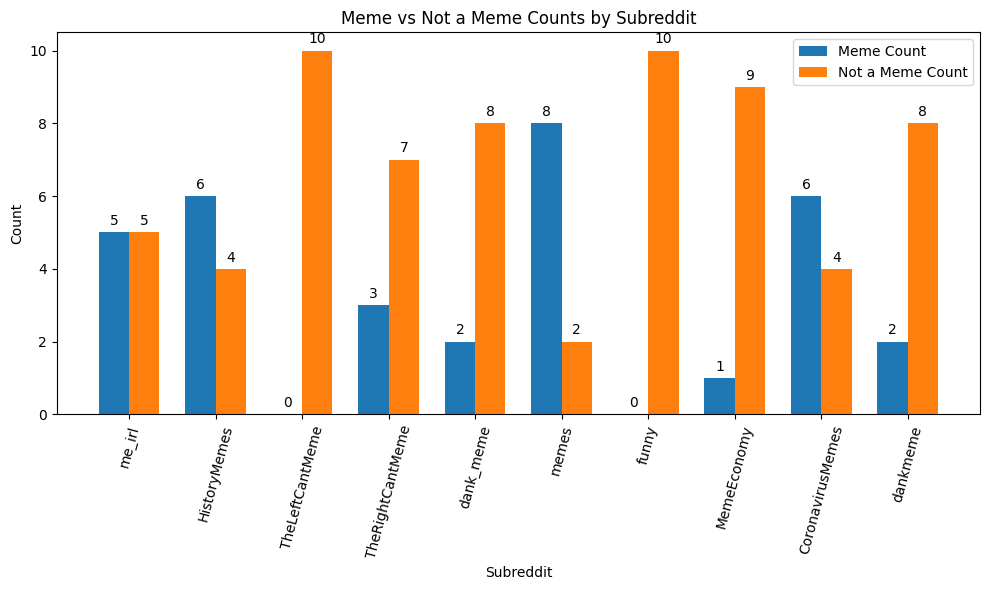

In [32]:
s2s_plot(subreddit, sl0, sl1, 'Meme Count', 'Not a Meme Count', 'Subreddit', 'Count', 'Meme vs Not a Meme Counts by Subreddit')

## Image Count upon Faiss Semantic Search Filtering

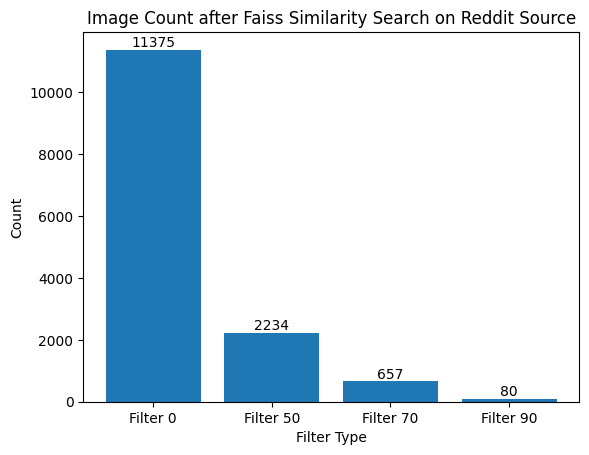

In [10]:
x = ["Filter 0", "Filter 50", "Filter 70", "Filter 90"]
df50 = pd.read_csv('../out/filtered_df_50.csv')
df70 = pd.read_csv('../out/filtered_df_70.csv')
df90 = pd.read_csv('../out/filtered_df_90.csv')
y = [11375, len(df50), len(df70), len(df90)]
basic_bar_plot(x, y, "Filter Type", "Count", "Image Count after Faiss Similarity Search on Reddit Source", rot=0)

## Image Count in each Subreddit after performing Similarity Search

In [6]:
subreddit = set()
dict50, dict70, dict90 = {}, {}, {}
def create_dict(df, idct):
    for val in list(df['reddit image'].values):
        v = val.split('/')[2]
        subreddit.add(v)
        if v not in idct:
            idct[v] = 0
        idct[v] += 1
        
def create_list(subreddit, dct):
    lst = []
    for sr in subreddit:
        if sr not in dct:
            lst.append(0)
        else:
            lst.append(dct[sr])
    return lst
        
create_dict(df50, dict50)
create_dict(df70, dict70)
create_dict(df90, dict90)
subreddit = list(subreddit)

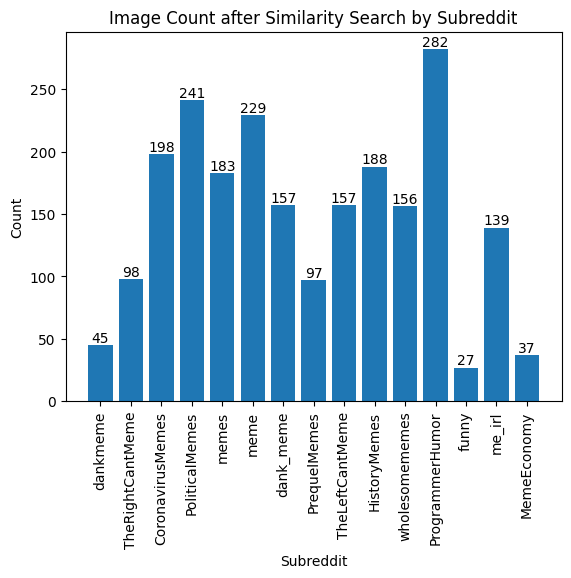

In [7]:
l = create_list(subreddit, dict50)
basic_bar_plot(subreddit, l, "Subreddit", "Count", "Image Count after Similarity Search by Subreddit", rot=90)

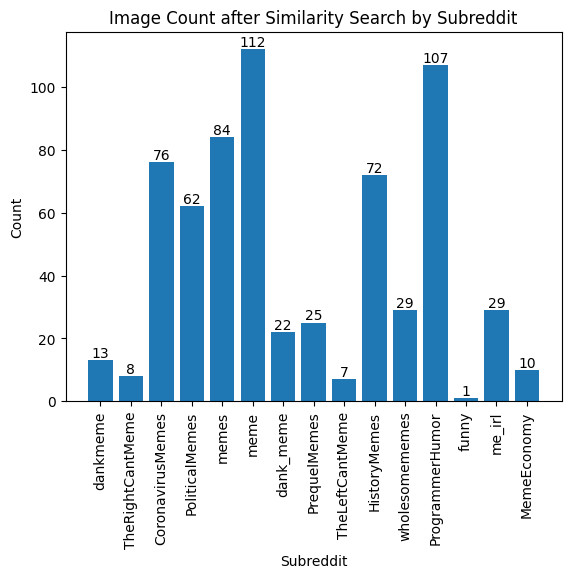

In [8]:
l = create_list(subreddit, dict70)
basic_bar_plot(subreddit, l, "Subreddit", "Count", "Image Count after Similarity Search by Subreddit", rot=90)

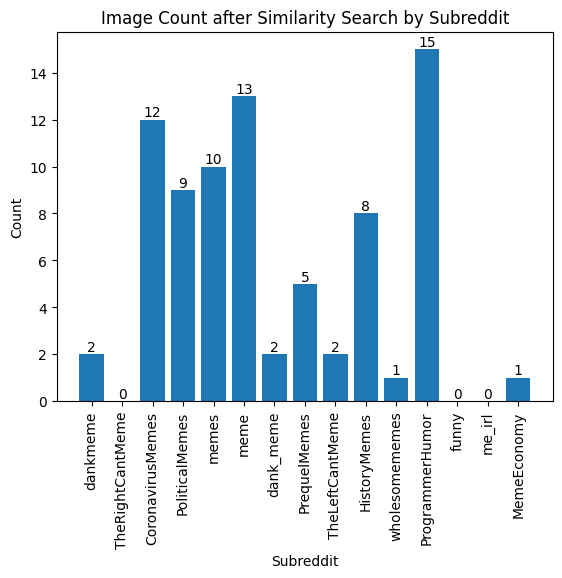

In [9]:
l = create_list(subreddit, dict90)
basic_bar_plot(subreddit, l, "Subreddit", "Count", "Image Count after Similarity Search by Subreddit", rot=90)

## IMKG Class Distribution for 70% Filter

In [56]:
imkg_templates = pd.read_csv('../graph/out/imkg_templates.tsv', sep='\t')
node1 = list(imkg_templates['node1'].values)
node2 = list(imkg_templates['node2'].values)
df_imkg_nodes = list(df70['imkg image'].values)
df_imkg_nodes = [x.split('/')[-1].split('.')[0] for x in df_imkg_nodes]
back_dict = {}
final_dict = {}
for x, y in tqdm(zip(node1, node2)):
    back_dict[x.split(':')[-1]] = y
for x in tqdm(df_imkg_nodes):
    get_imkg_name = back_dict[x]
    if get_imkg_name not in final_dict:
        final_dict[get_imkg_name] = 0
    final_dict[get_imkg_name] += 1
for x in node2:
    if x not in final_dict:
        final_dict[x] = 0
final_dict = dict(sorted(final_dict.items(), key=lambda x: x[1], reverse=True))

1326032it [00:00, 1409714.36it/s]
100%|██████████████████████████████████████████████████████████| 657/657 [00:00<00:00, 660512.40it/s]


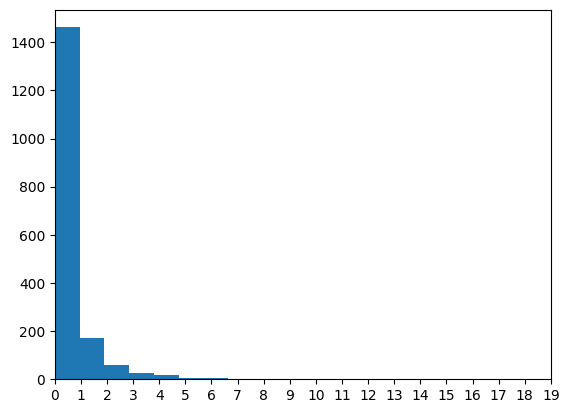

In [58]:
data_values = list(final_dict.values())
x_range = int(np.ceil(max(data_values))) - int(np.floor(min(data_values)))
plt.hist(data_values, bins=x_range+1)
plt.xlim([min(data_values), max(data_values)])
plt.xticks(np.arange(min(data_values), max(data_values)+1, 1.0))
plt.show()

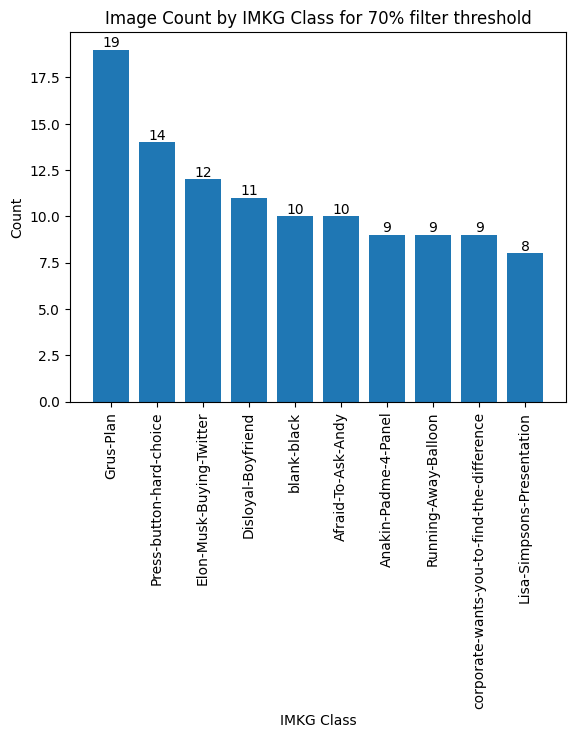

In [73]:
x = list(final_dict.keys())
y = list(final_dict.values())
x = [a.split(':')[-1].split('/')[-1] for a in x]
basic_bar_plot(x[:10], y[:10], "IMKG Class", "Count", "Image Count by IMKG Class for 70% filter threshold", rot=90)